# Régression linéaire à plusieurs variables - Exercices tirés du MOOC d'Andrew Ng

## Chargement des données

Le jeu de données donne la valeur de plusieurs maisons, ainsi que leur taille (pieds carrés) et le nombre de chambres à coucher

### Chargez les données du fichier ex1data1.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})

In [2]:
data = pd.read_csv("data.csv")

### Visualisez les données (valeurs réelles)

Maintenant, nous avons deux 'features'. Voyez si elles ont le même ordre de grandeur

In [3]:
data

,size,nb_bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


## Définissez quelques variables utiles

### Définissez X et y

X est maintenant une matrice de dimensions m x 2

In [36]:
X = data.iloc[:,:2].to_numpy()
y = np.array(data.price)

In [37]:
y.shape

(47,)

### Initialisez theta (combien de dimensions?)

In [38]:
# dimension (3,1)
theta = np.zeros(3)

In [39]:
theta.shape

(3,)

### Vérifiez les dimensions de theta et de X. Sont-elles compatibles pour implémenter la fonction d'hypothèse sous forme vectorisée?

In [40]:
theta.shape, X.shape

((3,), (47, 2))

Le nombre de colonne de X doit etre egal au nombre de colonnes de theta. On rajoute une colonne de 1 pour la feature x0

### Modifiez X en conséquence

In [41]:
X = np.c_[np.ones(X.shape[0]), X]

In [42]:
X.shape[0]


47

## Écrivez une fonction pour centrer et réduire les features

In [43]:
def featureScaleNormalize(X):
    mean = X.mean(axis=0)
    stdev = X.std(axis=0)
    X = (X - mean)/ stdev    
    return X, mean, stdev

In [44]:
X[:,1:], mean, stdev = featureScaleNormalize(X[:,1:])

In [45]:
X

array([[1.00, 0.13, -0.23],
       [1.00, -0.51, -0.23],
       [1.00, 0.51, -0.23],
       [1.00, -0.74, -1.55],
       [1.00, 1.27, 1.10],
       [1.00, -0.02, 1.10],
       [1.00, -0.59, -0.23],
       [1.00, -0.73, -0.23],
       [1.00, -0.79, -0.23],
       [1.00, -0.64, -0.23],
       [1.00, -0.08, 1.10],
       [1.00, -0.00, -0.23],
       [1.00, -0.14, -0.23],
       [1.00, 3.15, 2.43],
       [1.00, -0.93, -0.23],
       [1.00, 0.38, 1.10],
       [1.00, -0.87, -1.55],
       [1.00, -0.97, -0.23],
       [1.00, 0.77, 1.10],
       [1.00, 1.31, 1.10],
       [1.00, -0.30, -0.23],
       [1.00, -0.14, -1.55],
       [1.00, -0.50, -0.23],
       [1.00, -0.05, 1.10],
       [1.00, 2.40, -0.23],
       [1.00, -1.15, -0.23],
       [1.00, -0.69, -0.23],
       [1.00, 0.67, -0.23],
       [1.00, 0.25, -0.23],
       [1.00, 0.81, -0.23],
       [1.00, -0.21, -1.55],
       [1.00, -1.27, -2.88],
       [1.00, 0.05, 1.10],
       [1.00, 1.45, -0.23],
       [1.00, -0.24, 1.10],
       [

### Maintenant nous allons devoir adapter nos fonctions _predict_, _fit_, et _cost_ à une situation à plusieurs variables

In [46]:
def predict(X, theta):
    return np.dot(X, theta)

In [47]:
def cost(X, y, theta):
    return (1 / 2 * X.shape[0]) * np.sum((predict(X, theta) - y)**2)

In [48]:
def fit_with_cost(X, y, theta, alpha, num_iters):
    m = X.shape[0]
    J_history = []
    for i in range(num_iters):
        diff = np.dot((predict(X, theta) - y), X)
        theta = theta - (alpha / m) * diff
        J_history.append(cost(X,y,theta))
    
    return theta, J_history

## Lancez l'entrainement du modèle

Vous êtes libres de choisir alpha et num_iters cette fois!

In [49]:
theta = np.zeros(3)
theta, J_history = fit_with_cost(X, y, theta, alpha=0.01, num_iters=1500)

## Visualisez l'évolution du coût (graphe de convergence)

4513611506241.455


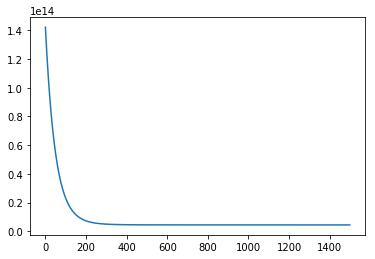

In [50]:
fit = plt.figure()
ax = plt.axes()
ax.plot(J_history)
print(J_history[-1])

## Testez votre modèle

Que vaut une maison de 1650 pieds carrés et de 3 chambres à coucher? (Si la valeur est aberrante, vous avez peut-être oublié une étape...)

In [51]:
X_test = (np.array([1650,3]) - mean) / stdev
X_test = np.hstack([1, X_test])
predict(X_test, theta)


293098.4666757651

### Réécrivez votre fonction fit pour qu'elle prenne en compte un parametre de regularisation (L1, L2 pour Lasso ou Ridge) et adapte la mise  a jour de theta an fonction de la regularization précisée

In [52]:
def get_regularization(theta, lbda, size, regularization):
    reg = 0
    if regularization == "L1":
        reg = (lbda / (2*size)) * np.sum(np.absolute(theta[1:])) #regularization does not apply on theta 0
    elif regularization == "L2":
        reg = (lbda / (2*size)) * np.sum(np.square(theta[1:]))
    return (reg)

def get_regularization_derived(theta, size, lbda, regularization=None):
    if not regularization:
        return 0    
    elif regularization == "L1":
        reg = (lbda / (2*size)) * (theta / np.absolute(theta))
    elif regularization == "L2":
        reg = (lbda / size) * theta
    reg[0] = 0 #the regularization is not applied on theta_0
    return (reg)  

def fit_with_regularization(X, y, theta, alpha, num_iters, regularization="L2", lbda=0.1):
    m = X.shape[0]
    J_history = []
    for i in range(num_iters):
        reg = get_regularization_derived(theta, m, lbda, regularization)
        diff = np.dot((predict(X,theta) - y), X)
        theta = theta - alpha * (diff / m + reg)   
        J_history.append(cost(X,y,theta) + get_regularization(theta, lbda, m, regularization))    
    return theta, J_history

In [53]:
theta = np.zeros(3)
theta, J_history = fit_with_regularization(X, y, theta, alpha=0.01, num_iters=1500, regularization="L2", lbda=0.01)
print(theta)
X_test = (np.array([1650,3]) - mean) / stdev
X_test = np.hstack([1,X_test])
predict(X_test, theta)

[340412.56 109335.29 -6479.88]


293109.28505404963

### La fonction fit au complet. Ajoutez un dernier parametre qui précise le gradient employé (stochastic, mini_batch(avec le batch_size), batch). Pour la descente de gradient stochastic et minibatch on met a jour le learning rate avec la formule du learning rate decay

In [94]:
def get_batch_size(gradient_descent, batch_size, size):
    batch_s = size
    if gradient_descent == "mini_batch":
        batch_s = batch_size
    elif gradient_descent == "stochastic":
        batch_s = 1
    return batch_s

def learning_decay(alpha, epochs, decay_rate):
    return (1 / (1 + decay_rate * epochs))

def batch_generator(X, y, gd, batch_size):
    if gd == "stochastic":
        np.random.shuffle(X)
    size = X.shape[0]
    b_size = 0
    batches_X = []
    batches_y = []
    while (b_size + batch_size) < size:
        batches_X.append(X[b_size:(b_size + batch_size)])
        batches_y.append(y[b_size:(b_size + batch_size)])
        b_size += batch_size
    batches_X.append(X[b_size:size])
    batches_y.append(y[b_size:size])
    nb_batches = size // batch_size
    while True:
        for rand_nb in range(nb_batches):
            yield batches_X[rand_nb], batches_y[rand_nb]

def complete_fit(X,
                 y,
                 theta,
                 alpha,
                 num_iters,
                 regularization=None,
                 lbda=0.01,
                 gradient_descent="batch",
                 batch_size=4):
    
    m = X.shape[0]
    J_history = []
    
    batch_size = get_batch_size(gradient_descent, batch_size, m)
    b_gen = batch_generator(X, y, gradient_descent, batch_size)
    
    for i in range(num_iters):
        X_tmp, y_tmp = next(b_gen)
        reg = get_regularization_derived(theta, batch_size, lbda, regularization)
        diff = np.dot((predict(X_tmp,theta) - y_tmp), X_tmp)
        theta = theta - alpha * (diff / batch_size + reg)
        J_history.append(cost(X_tmp,y_tmp,theta) + get_regularization(theta, lbda, batch_size, regularization))
    
    return theta, J_history

[336669.73 8821.58 25723.64]
[336669.73 8821.58 25723.64]
9884454.949009957
Prediction :  326918.9740933794


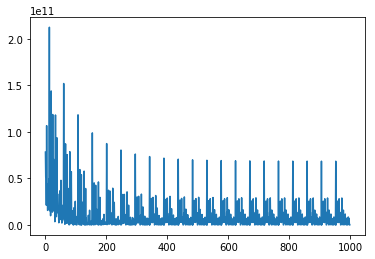

In [95]:
theta = np.zeros(3)
theta, J_history = complete_fit(X, y, theta, alpha=0.01, num_iters=1000,regularization="L2",
                                lbda=0.01, gradient_descent="stochastic", batch_size=16)
print(theta)
fit = plt.figure()
ax = plt.axes()
ax.plot(J_history)
print(theta)
print(J_history[-1])

X_test = (np.array([1650,3]) - mean) / stdev
X_test = np.hstack([1,X_test])
print("Prediction : ",predict(X_test, theta))

[348973.02 4250.82 29375.97]
[348973.02 4250.82 29375.97]
2166912669179.9778
Prediction :  340435.2542107264


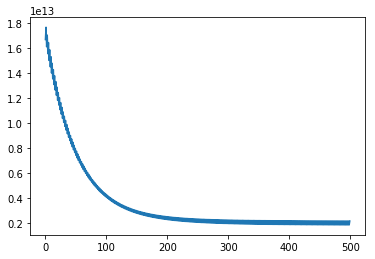

In [96]:
theta = np.zeros(3)
theta, J_history = complete_fit(X, y, theta, alpha=0.01, num_iters=500,regularization="L2",
                                lbda=0.01, gradient_descent="mini_batch", batch_size=16)
print(theta)
fit = plt.figure()
ax = plt.axes()
ax.plot(J_history)
print(theta)
print(J_history[-1])

X_test = (np.array([1650,3]) - mean) / stdev
X_test = np.hstack([1,X_test])
print("Prediction : ",predict(X_test, theta))

[338175.98 2572.43 24583.04]
[338175.98 2572.43 24583.04]
16123993490696.133
Prediction :  331470.502851973


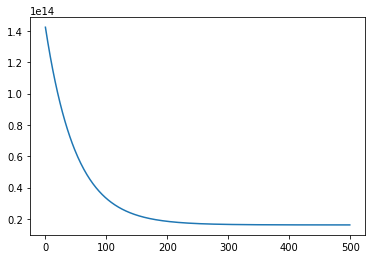

In [97]:
theta = np.zeros(3)
theta, J_history = complete_fit(X, y, theta, alpha=0.01, num_iters=500,regularization="L2",
                                lbda=0.01, gradient_descent="batch", batch_size=16)
print(theta)
fit = plt.figure()
ax = plt.axes()
ax.plot(J_history)
print(theta)
print(J_history[-1])

X_test = (np.array([1650,3]) - mean) / stdev
X_test = np.hstack([1,X_test])
print("Prediction : ",predict(X_test, theta))